## Convexfication vs Non-Convexfication

This notebook studies the difference between using convexification and not using it. I will use the HLMW framework for the analysis. One case will involve HLMW without convexification, and the other will involve HLMW with convexification.

In fact, the results of the two cases are almost identical. Nevertheless, there are slight differences, and these subtle differences are important in numerical analysis. They can significantly affect how smoothly the CEV appears. Additionally, these minor differences can influence welfare comparisons. Specifically, when calculating dF under convexification, the differences seem slightly more pronounced.

In [1]:
import bcw_bj as main
import hlmw as hlmw
import hlmw_convexfication as hlmw_convexfication
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import interpolate
from scipy.optimize import brentq, fsolve
#import tikzplotlib
import time

In [3]:
σ_DM=0.5
Ubar_CM=1.9
n=0.65
α_1=0.1

Non-convexfication-HLMW

In [4]:
model_hlmw =hlmw.hlmw_mod(σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = 0.00,α_1=α_1,τgrid_size = 20,N_reimann = 300,Tol=1e-10)

Convexfication-HLMW

In [5]:
model_hlmw_convexfication =hlmw_convexfication.hlmw_mod(σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = 0.00,α_1=α_1,τgrid_size = 20,N_reimann = 300,Tol=1e-10)

In [15]:
τ=0

In [7]:
z_hlmw = model_hlmw.z_solver(τ)
z_hlmw

0.911328129879508

In [8]:
z_hlmw_convexfication = model_hlmw_convexfication.z_solver(τ)
z_hlmw_convexfication

0.9113547073661723

In [47]:
z_hlmw<z_hlmw_convexfication

True

### Although subtle, the real balance $z$ is larger in the case with convexification. Considering that pecuniary externality arises at low inflation rates, this difference can lead to significant impacts.

### The following compares $R$, $F$, and $dF$ given a specific $z$. 
### The results show that while $R$ remains the same, there are differences in $F$ and $dF$.

In [10]:
z = 0.7

In [11]:
ρ_grid=model_hlmw.support_grid_func(z, τ)

In [12]:
ρ_grid_convexification=model_hlmw_convexfication.support_grid_func(z, τ)

In [17]:
F=[model_hlmw.F_func(ρ,z) for ρ in ρ_grid]
F_convexfication=[model_hlmw_convexfication.F_func(ρ,z) for ρ in ρ_grid]

In [22]:
temp=np.array(F_convexfication)-np.array(F)

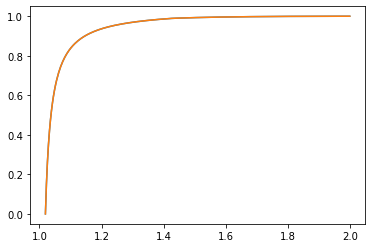

In [23]:
plt.plot(ρ_grid,F)
plt.plot(ρ_grid,F_convexfication)

## The calculation results show that, although minimal, $F$ is slightly lower in the case with convexification when the price is lower.

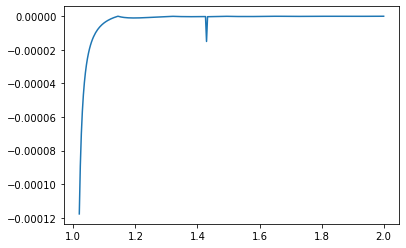

In [26]:
plt.plot(ρ_grid,temp)

In [25]:
temp.sum()

-0.0007693033998584786

# R remains the same.

In [28]:
Rex = model_hlmw_convexfication.R_ex(ρ_grid, z)
        
R_grid,R_fit=model_hlmw_convexfication.R(ρ_grid, Rex, DropFakes=True)

In [38]:
R=[model_hlmw.R_func(ρ,z) for ρ in ρ_grid]
R_convexfication=[R_fit(ρ) for ρ in ρ_grid]

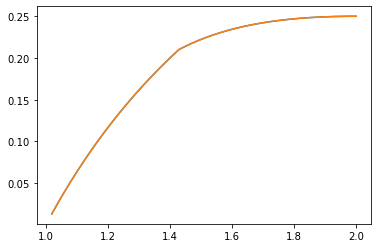

In [39]:
plt.plot(ρ_grid,R)
plt.plot(ρ_grid,R_convexfication)

In [41]:
np.array(R)-np.array(R_convexfication)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [42]:
dF=[model_hlmw.dF_func(ρ,z) for ρ in ρ_grid]
dF_convexfication=[model_hlmw_convexfication.dF_func(ρ,z) for ρ in ρ_grid]

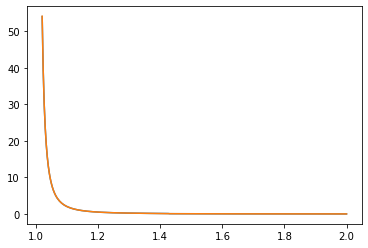

In [43]:
plt.plot(ρ_grid,dF)
plt.plot(ρ_grid,dF_convexfication)

# dF shows a difference. This is likely because the derivation with convexification uses a module, which causes the variation.

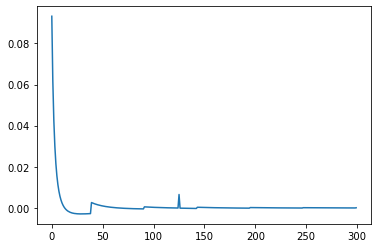

In [48]:
plt.plot(np.array(dF_convexfication)-np.array(dF))